In [ ]:
pip install matplotlib

  Using cached matplotlib-3.8.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached contourpy-1.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.2/156.2 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
  Using cached numpy-1.26.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached Pillow-10.1.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.5 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.8.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
Using cached contourpy-1.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (313 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━

In [1]:
pip install psycopg2-binary

36.30s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
  Using cached psycopg2_binary-2.9.9-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
Using cached psycopg2_binary-2.9.9-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import psycopg2
from datetime import datetime, timedelta

# Database connection parameters
db_params = {
    "database": "scrappeddata",
    "user": "postgres",
}

# Function to fetch data for a specific subreddit and date range
def fetch_subreddit_data(subreddit, start_date, end_date):
    conn = psycopg2.connect(**db_params)
    cursor = conn.cursor()

    query = """
        SELECT
            DATE_TRUNC('hour', job_start) AS hour_start,
            SUM(comments_added) AS total_comments_added
        FROM
            reddit_job_stats
        WHERE
            subreddit = %s
            AND job_start >= %s::timestamp
            AND job_start < %s::timestamp
        GROUP BY
            hour_start
        ORDER BY
            hour_start;
    """

    cursor.execute(query, (subreddit, start_date, end_date))
    result = cursor.fetchall()

    cursor.close()
    conn.close()

    return result


def fetch_subreddit_data2(subreddit, start_date, end_date):
    conn = psycopg2.connect(**db_params)
    cursor = conn.cursor()

    query = """
        SELECT
            job_start, comments_added
        FROM
            reddit_job_stats
        WHERE
            subreddit = %s
            AND job_start >= %s::timestamp
            AND job_start < %s::timestamp
    """

    cursor.execute(query, (subreddit, start_date, end_date))
    result = cursor.fetchall()

    cursor.close()
    conn.close()

    return result


# Specify the date range
start_date = datetime(2023, 11, 1)
end_date = datetime(2023, 11, 14)

# Fetch data for the "politics" subreddit within the specified date range
politics_data = fetch_subreddit_data2('politics', start_date, end_date)

# Extract data for plotting
hours = [row[0] for row in politics_data]
comment_counts = [row[1] for row in politics_data]

# Plotting as a line graph
plt.figure(figsize=(10, 6))
plt.plot(hours, comment_counts, marker='o', linestyle='-', color='blue')
plt.title('Number of Comments per Hour on r/politics')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'matplotlib'

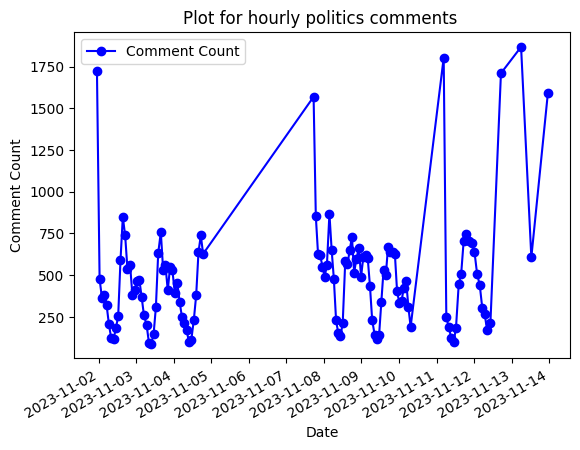

In [16]:
import matplotlib.dates as mdates
timestamp = [row[0] for row in politics_data]

comment_counts = [row[1] for row in politics_data]  # Assuming this is correct

# Convert timestamps to numeric values for plotting
numeric_timestamp = [datetime.timestamp(ts) for ts in timestamp]

# Create scatter plot
plt.plot(timestamp, comment_counts, marker='o', color='blue', label='Comment Count')

# Format x-axis as dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

# Rotate the dates for better readability
plt.gcf().autofmt_xdate()

# Label the axes and give the plot a title
plt.xlabel('Date')
plt.ylabel('Comment Count')
plt.title('Plot for hourly politics comments ')


# Display the legend
plt.legend()
plt.savefig("reddit_politics_comments.png")
# Show the plot
plt.show()

In [14]:
print(timestamp)

[datetime.datetime(2023, 11, 1, 22, 56, 26, 797136), datetime.datetime(2023, 11, 2, 0, 37, 50, 300379), datetime.datetime(2023, 11, 2, 2, 6, 45, 287690), datetime.datetime(2023, 11, 2, 3, 35, 34, 669527), datetime.datetime(2023, 11, 2, 5, 4, 19, 826743), datetime.datetime(2023, 11, 2, 6, 32, 51, 846013), datetime.datetime(2023, 11, 2, 8, 1, 13, 172250), datetime.datetime(2023, 11, 2, 9, 33, 46, 97772), datetime.datetime(2023, 11, 2, 11, 2, 24, 999509), datetime.datetime(2023, 11, 2, 12, 30, 35, 961038), datetime.datetime(2023, 11, 2, 13, 59, 13, 523680), datetime.datetime(2023, 11, 2, 15, 28, 0, 242360), datetime.datetime(2023, 11, 2, 16, 56, 51, 118586), datetime.datetime(2023, 11, 2, 18, 25, 46, 258492), datetime.datetime(2023, 11, 2, 20, 6, 37, 571839), datetime.datetime(2023, 11, 2, 21, 35, 27, 826471), datetime.datetime(2023, 11, 2, 23, 4, 15, 114824), datetime.datetime(2023, 11, 3, 0, 33, 3, 483546), datetime.datetime(2023, 11, 3, 2, 1, 42, 706312), datetime.datetime(2023, 11, 3,